# Introduction

"In this competition, you’re challenged to build a multi-headed model that’s capable of detecting different types of of toxicity like threats, obscenity, insults, and identity-based hate better than Perspective’s current models. You’ll be using a dataset of comments from Wikipedia’s talk page edits. Improvements to the current model will hopefully help online discussion become more productive and respectful."


https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge

### Imports

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

### Data Read in / Test Train Split


In [3]:
tc = pd.read_csv('C:\\Users\\Harrison\\.kaggle\\competitions\\jigsaw-toxic-comment-classification-challenge\\train.csv\\train.csv')
tc = tc.drop('id', axis = 1)
X = tc.iloc[:,0]
y = tc.iloc[:, 1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

# Checking Data Consistency

In [3]:
tc.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


#### No N/A Values

In [44]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 7 columns):
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(1)
memory usage: 8.5+ MB


#### We have 159,571 samples and 6 possible labels.

In [17]:
y.shape

(159571, 6)

#### The number of samples in each category.

In [15]:
y.sum()

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

#### Percent of entire sample population belonging to each label. (Notice unbalanced classes...)

In [18]:
y.mean()*100

toxic            9.584448
severe_toxic     0.999555
obscene          5.294822
threat           0.299553
insult           4.936361
identity_hate    0.880486
dtype: float64

#### Some Samples have multiple labels.


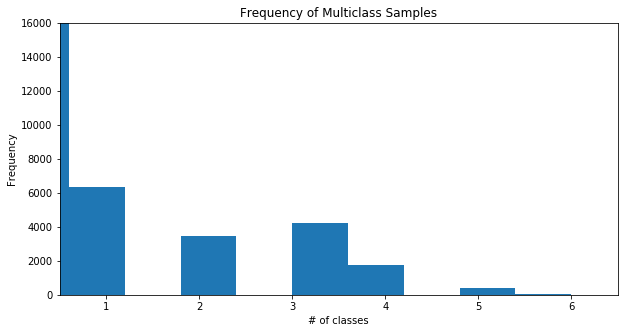

In [38]:
y.sum(axis = 1).plot(kind = 'hist')
plt.xlim([0.5,6.5])
plt.ylim([0,16000])
plt.title('Frequency of Multiclass Samples')
plt.xlabel('# of classes')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

We might be able to do something smart by checking if some classes are mutually exclusive or if being in one class correlates with being in another class. For now we should be good to go to create a baseline model that will be our standard for performance.

# Model Building

### Instantiate Tokenizer and Bag-of-Words

In [3]:
def tokenizer(doc):
    return doc.split()
tfidf = TfidfVectorizer(tokenizer = tokenizer)
clf = LogisticRegression()
pipe = Pipeline([('vec',tfidf), ('clf', clf)])

### Fit / Predict

In [4]:
pipe.fit(X_train, y_train.iloc[:,0])
y_score = pipe.decision_function(X_test)
pred = pipe.predict(X_test)

### Scoring
#### Accuracy

In [5]:
print('Logistic Regression Accuracy: ', accuracy_score(y_test.iloc[:,0], pred))

Logistic Regression Accuracy:  0.950524831584


#### Classification Report

In [7]:
print(classification_report(y_test.iloc[:,0], pred, target_names = [ 'Not Toxic', 'Toxic' ]))

             precision    recall  f1-score   support

  Not Toxic       0.95      0.99      0.97     28841
      Toxic       0.90      0.55      0.68      3074

avg / total       0.95      0.95      0.95     31915



#### AUC Score

In [8]:
prob = pipe.predict_proba(X_test)[:,1]
print('AUC Score: ', roc_auc_score(y_test.iloc[:,0], prob))

AUC Score:  0.958140629562
